# 버스 혼잡도 예측 및 시각화를 통한 안전한 버스 승차
<hr>

## 1. 개요
코로나가 장기화 되면서 국민의 안전을 위협받고 있는 상황입니다. 
저희팀은 데이터 엔지니어링을 공부하고 있는 인원으로 구성되어 있으며, 데이터 사이즈가 큰 국토교통 데이터를 활용해보고자 이번에 대회에 참여하게 되었습니다. 그리하여 국토교통부에서 제공하는 방대한 데이터의 처리와, 이를 통해 어떻게 안전한 환경을 제공할 것인가라는 아이디어에 중점을 두고 프로젝트를 진행하였습니다. 조금이나마 도움이 되었으면 하는 바램입니다. 

### 1.1. 분석 목적
- 교통데이터 거래소에서 제공하는 방대한 데이터 처리.
- 노선별 시간별 버스 혼잡도 예측 및 시각화.

### 1.2. 사용 데이터
- [한국교통안전공단]교통카드빅데이터(https://bigdata-transportation.kr/)
- 기상예보 데이터(https://data.kma.go.kr/)
- 공휴일 데이터(파이썬 라이브러리 workalendar)
<br><br>


## 2. 데이터 처리 아키텍쳐
'교통데이터 거래소'에서 제공하는 '교통카드빅데이터'는 압축을 모두 풀게 되면 약 1TB의 size를 가지고 있습니다. 그리고 저희가 그 중 중점적으로 사용한 '노선별 재차인원' 데이터만 해도 단일 파일이 약 52GB가 됩니다. 단일 PC에서 처리하는데 속도 및 가용성 면에서 용이하지 않습니다. 그리하여 저희팀은 아래와 같은 데이터 아키텍쳐를 구성하여 처리 및 분석하였습니다.


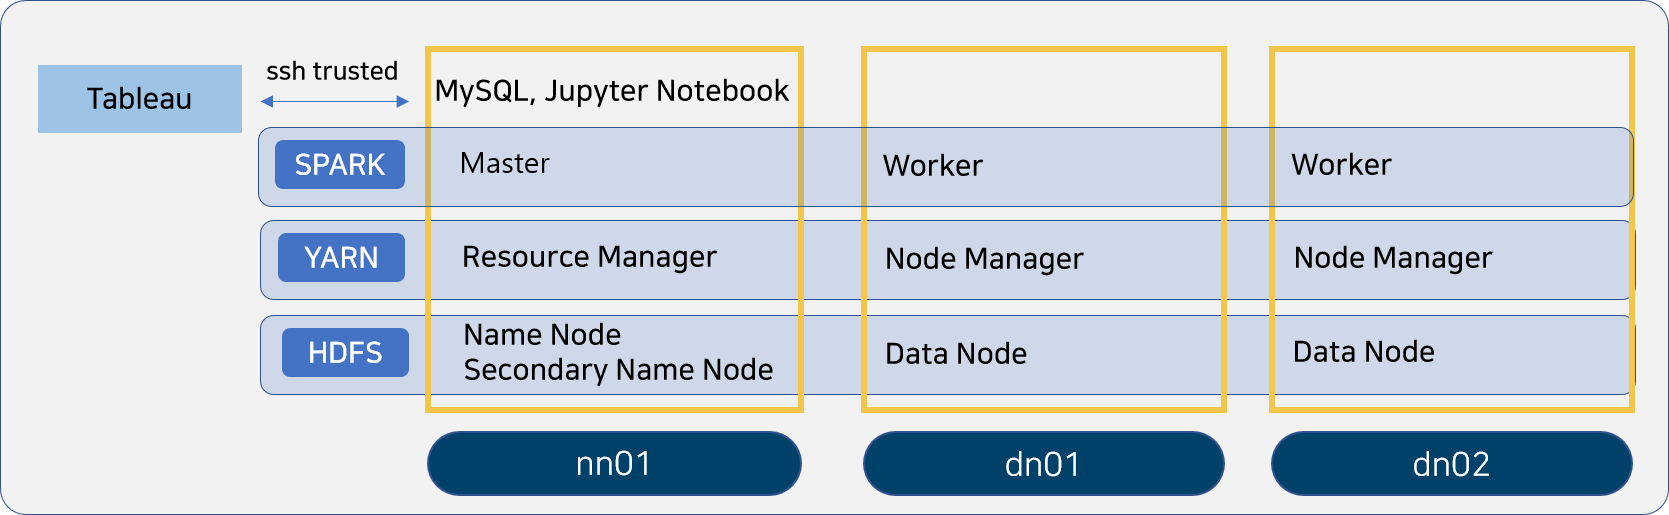

In [1]:
from PIL import Image
from IPython.display import IFrame, HTML
Image.open('C:\\Users\\Song\\Pictures\\System Architecture.png')

데이터 레이크를 구성하여 모든 데이터를 하둡 hdfs에 저장하고, 스파크를 통해서 전처리 후 전처리 된 데이터를 python 코드로 분석 및 모델링을 수행하였고, 스파크로 mysql에 filtering 된 데이터 저장 후 시각화 할 수 있도록 하였습니다. 
<br>
※ 데이터 아키텍쳐 구축의 상세한 내용은 추후 github를 통해 공개하도록 하겠습니다.

### 2.1. 파이스파크 설치
현재 제출한 jupyter notebook에는 구축한 서버를 통하지 않고, 파이썬 코드를 이용하여 처리하는 방법을 제시하였습니다. 다만, size가 큰 '노선별 재차인원'의 데이터(52GB) 추출을 위해서 파이스파크를 사용하였습니다.
<br>
파이스파크 사용을 위해서 https://spark.apache.org/downloads.html 에서 스파크 설치가 필요합니다.(spark-2.4.6-bin-hadoop2.7.tgz를 사용하였습니다.)

**※ Windows에서 jupyter notebook으로 pyspark 사용하는 방법**
1. anaconda 설치
2. 스파크 설치 파일 압출 풀고 opt 경로 밑에 위치한다. 환경변수 home과 path 설정을 해줍니다.
 - SPARK_HOME	C:\opt\spark-2.4.6-bin-hadoop2.7
 - path 변수 추가 	C:\opt\spark-2.4.6-bin-hadoop2.7\bin	C:\opt\spark-2.4.6-bin-hadoop2.7\sbin
3. cmd 관리자 실행 창에서 pyspark 입력하면 수행창 생성
4. 파이스파크의 home 설정(pyspark를 jupyter notebook과 연결해 주기 위한 목적)
 - PYSPARK_DRIVER_PYTHON 	ipython3
 - PYSPARK_DRIVER_PYTHON_OPTS	notebook
5. 이후 cmd 관리자 실행 창에서 pyspark을 치면 jupyter notebook 이 open 됩니다.
<br><br>

## 3. 노선별 시간별 버스 혼잡도 예측 및 시각화
### 3.1. 배경
코로나의 확산을 피하기 위해 사람들간에 밀집하지 않는 것이 중요하다고 판단 됩니다. 이를 위해서 대중교통인 버스 재차 인원을 줄이는게 한가지 방법이 될 수 있다고 여겨졌습니다. 수요와 공급의 균형을 맞추기 위해, 버스 재차 인원이 몰리는 지역 및 시간에 버스 노선을 늘리고 배차 간격을 줄이는 방식으로 공급을 늘릴 수 있겠고, 버스 혼잡도를 예측하여 고객으로 하여금 버스가 혼잡한 시간대를 피해서 이용하도록 정보를 주는 방식으로 수요를 줄일 수 있겠습니다.
<br>
현재도 버스 정류장에 가면 정류장의 전광판에 '여유', '보통', '혼잡'과 같은 표시를 보신 적이 있으실 겁니다. 하지만 이는 바로 전 정류장에서 출발한 버스의 혼잡도만 확인할 수 있습니다. 저희는 1주일간의 전체 버스 노선의 혼잡도를 예측하여 좀 더 쾌적한 대중교통 이용이 가능하도록 하고자 합니다.

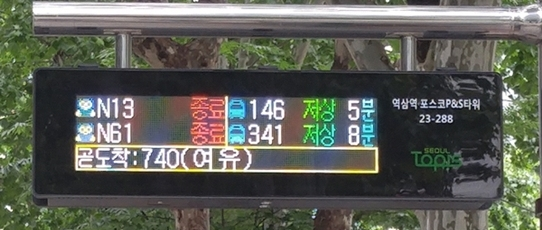

In [2]:
Image.open('C:\\Users\\Song\\Pictures\\Bus Sign.png')

### 3.2. 시각화(Tableau) 설명
하단의 '시각화(Tableau) 설명' 참조
<br>

### 3.3. Prediction Code
하단의 'Prediction Code' 참조
<br><br>

## 4. 결론
이번 프로젝트를 통해서 '다량의 데이터를 어떻게 '효율적'으로 처리해야 하는지 방법에 대해 고민해보고, 태블로를 활용하여 다양한 Insight를 발견해보고자 하였습니다. 그리고 정확한 데이터 혼잡도를 예측해보고자 모델링을 해보았습니다.
<br>
특히, 모델링을 진행하면서 다양한 변수, 과적합 문제, 큰 데이터 사이즈, 불균형한 데이터 등 여러가지 고려해야할 사항들과 마주하게 되었습니다. 이러한 부분을 되도록이면 쉽게 접근해보고자 노력해보았습니다. 최종적으로 버스 혼잡도에 대한 예측 정확도 약 96%, 평균 재현율 약 86%로 만족할 만한 결과를 얻을 수 있었습니다.
<br><br>

## 5. 보완점
'교통데이터 거래소'에서 제공하는 '교통카드빅데이터'의 경우 2019년 1월부터 5월까지 2020년 1월부터 5월까지의 데이터만 제공하고 있습니다. 6월~12월까지의 데이터와 실시간 api를 제공한다면 더욱 정확한 예측 및 활용을 기대할 수 있겠습니다.

<br>

# 시각화(Tableau) 설명
<hr>


## 1. 지역/시간별 승하차인원
분석내용 : 
대표적인 상업지역인 중구, 종로구, 영등포구, 강남구 등 지역은 출근 시간에 하차 인원이 많고 퇴근시간에는 승차 인원이 많은 것으로 파악.
타 지역(구)에서 출근을 위해 상업지역으로 집중되는 현상으로 추정.
구로, 송파, 동대문, 서대문 지역은 거주와 상업이 모두 존재하는 지역으로 출/퇴근 시간대에 승/하차 분포가 거의 동일하게 발생됨.
대표적인 거주지역인 강서구, 은평구, 노원구, 중랑구에서는 출근 시간대 승차 인원이 많고 퇴근시간대에는 하차 인원이 많음.

DATA :
정류장별 이용량 (DM_STTNBY_USECNT_T)

[Tableau Link](https://public.tableau.com/shared/4438BTT9J?:display_count=y&:origin=viz_share_link)
자세한 Tableau 내용은 Link로 확인 가능.

In [3]:
IFrame('https://public.tableau.com/shared/4438BTT9J?:showVizHome=no&:embed=true', width = 1024, height = 576)

## 2. 요일/시간별 승하차인원
분석내용 : 
평일에는 출퇴근시간에 대중교통 이용 승/하차 인원이 집중되어 있으나 휴일에는 늦은 오전부터 저녁때까지 승/하차 인원이 상대적으로 많은 것으로 분석.
휴일중에서도 토요일 이용승객이 일요일에 비해 60% 이상 이용량이 많음.

DATA :
정류장별 이용량 (DM_STTNBY_USECNT_T)

[Tableau Link](https://public.tableau.com/views/time_day_inout/sheet1?:language=ko&:display_count=y&:origin=viz_share_link)
자세한 Tableau 내용은 Link로 확인 가능.

In [4]:
IFrame('https://public.tableau.com/views/time_day_inout/sheet1?:showVizHome=no&:embed=true', width = 1024, height = 576)

## 3. 평일/휴일에 따른 시간별 재차인원
분석내용 :
평일은 재차인원이 출근/퇴근시간대 많은 경향이 보이나 휴일은 낮 시간대에 재차인원이 높은 것을 보임.
2019년에 비해 2020년은 COVID-19의 영향으로 대중교통(서울 간선 노선)의 이용량이 전반적으로 줄었음.
특히 COVID-19가 급격히 확산한 3월의 휴일 대중교통(서울 간선 노선) 재차인원은 급격하게 감소한 것으로 보임.
평일의 경우에는 출퇴근 인원이 많아 감소폭이 크지 않으나 휴일의 경우 불필요한 외출이 줄었으며, 외출 시 자기차량을 이용한 것으로 추정.

DATA : 
노선별 재차인원 (DM_RUTBY_PASGR_T)

[Tableau Link](https://public.tableau.com/views/day_holi_time/sheet0?:language=ko&:display_count=y&:origin=viz_share_link)
자세한 Tableau 내용은 Link로 확인 가능.

In [5]:
IFrame('https://public.tableau.com/views/day_holi_time/sheet0?:showVizHome=no&:embed=true', width = 1024, height = 576)

[Tableau Link](https://public.tableau.com/views/day_holi_time_march/3?:language=ko&:display_count=y&:origin=viz_share_link)
자세한 Tableau 내용은 Link로 확인 가능.

In [6]:
IFrame('https://public.tableau.com/views/day_holi_time_march/3?:showVizHome=no&:embed=true', width = 1024, height = 576)

## 4. 지역별 통행인원(출발 / 도착)
분석내용 : 
대중교통을 이용한 통행 인원은 대부분 동일 지역(구)에서 이동하며, 동일 지역을 제외하고는 인근 지역(구)에 통행 인원이 상대적으로 많이 분포되어 있음.
강남, 종로, 중구의 경우는 인근지역이 아니더라도 타 지역에서 유입되는 통행 인원이 원거리임에도 많음.

DATA : 
교통카드 OD (DM_OD_TRCRD_T)

[Tableau Link](https://public.tableau.com/views/local_fst_project/1?:language=ko&:display_count=y&:origin=viz_share_link)
자세한 Tableau 내용은 Link로 확인 가능.

In [7]:
IFrame('https://public.tableau.com/views/local_fst_project/1?:showVizHome=no&:embed=true', width = 1024, height = 576)

<br>

# Predcition Code
<hr>

## 1. 라이브러리 가져오기
### 1.1. 파이썬 용 라이브러리 

In [1]:
import os
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from workalendar.asia import SouthKorea # 한국의 공휴일, version : 1.1.1
import datetime
from datetime import date, timedelta

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GroupKFold
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import gc
import urllib.request, re
import xml.etree.ElementTree as ET
from imblearn.under_sampling import * # Scikit-Learn이 0.23 버젼 이상이어야 정상적으로 활용 가능
from imblearn.over_sampling import *

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
palette = sns.color_palette('twilight') + sns.color_palette('bright')

In [2]:
# 주요 라이브러리 버젼
print('Pandas : %s'%(pd.__version__))
print('Numpy : %s'%(np.__version__))
print('Scikit-Learn : %s'%(sklearn.__version__))
!python --version

Pandas : 1.1.1
Numpy : 1.18.1
Scikit-Learn : 0.23.2
Python 3.7.6


### 1.2. 파이스파크 용 라이브러리

In [3]:
# 파이스파크 용 라이브러리
# 대용량 데이터의 경우 파이썬으로 처리가 어려워 스파크 사용
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

## 2. 데이터 가져오기

### 2.1. 노선 데이터 추출
DM_ROUTE_T.dat(노선 데이터)에서 서울 간선 버스 노선 데이터 추리기 위함

In [4]:
# DM_ROUTE_T.dat(노선 데이터)에서 서울 간선 버스 노선 데이터 추리기 위함
route = pd.read_csv('C:\\Users\\Song\\Downloads\\CARD_0001\\DM_ROUTE_T.dat', delimiter='|', 
                   names = ['OPRAT_DATE','TCBO_ID','EXCCLC_AREA_CD','ROUTE_ID','SD_CD','SGG_CD','TFCMN_CD','TFCMN_GB_CD','ROUTE_NO','ROUTE_NMA','ROUTE_STTN_CNT','ROUTE_DST','STG_STTN_ID','ARR_STTN_ID','STG_STTN_NMA','ARR_STTN_NMA']
                  )

# 시도 코드가 서울(11)이고 버스(B), 간선(01) 인 노선번호만 추출하기 위함
seoul_route_id = route.loc[(route['SD_CD'] == 11) & (route['TFCMN_GB_CD'] == 'B') &  (route['TFCMN_CD'] == '05')].ROUTE_ID
seoul_route_id = seoul_route_id.unique()

# 리스트로 변경하여 pyspark에서 조건으로 사용하기 위함
seoul_route_id = seoul_route_id.tolist()

### 2.2. 노선별 재차인원 데이터 추출(파이스파크)
'노선별 재차인원' 데이터 중 서울 간선 버스인 것만 추출
<br>
대용량 데이터의 경우 파이썬으로 처리가 어려워 스파크 사용

In [8]:
# 대용량 데이터의 경우 파이썬으로 처리가 어려워 스파크 사용
# 스파크 세션 생성
spark = SparkSession.builder.appName("DataAnalysis").getOrCreate()

# 노선별 재차인원 데이터 추출
data = spark.read \
.option("delimiter", "|") \
.csv(r"C:\Users\Song\Downloads\CARD_0003\DM_RUTBY_PASGR_T.dat")

# seoul 간선 버스 인 것만 추출
data_1 = data.filter(col("_c7") == "B").filter(col("_c8").isin(seoul_route_id))

# 추후 재사용(개발 편의)을 위해 seoul 시내버스에 해당하여 csv 파일 생성
data_1.coalesce(1).write.format("com.databricks.spark.csv").save(r"C:\Users\Song\Downloads\CARD_0003\SEOUL_BLUE")

### 2.3. 노선별 재차인원 데이터 추출(파이썬)
csv로 생성한 '서울 간선버스 재차인원' 데이터를 추출

In [3]:
# 서울 간선버스 데이터만
# 'SD_CD', SGG_CD','USE_AREA_CD'에'~' 가 포함되는 데이터가 존재
types_dict = {'YYYY': int, 'YYYYMM': int, 'OPRAT_DATE': int, 'WEEK_GB': object, 'TZON': int, 'TCBO_ID': object, 'EXCCLC_AREA_CD': object, 'TFCMN_GB_CD': object, 'ROUTE_ID': object, 'STTN_SEQ': int, 'STTN_ID': object, 'SD_CD': object, 'SGG_CD': object, 'USE_AREA_CD': object, 'PASGR': float, 'MAX_PASGR': int}
data = pd.read_csv('C:\\Users\\Song\\Downloads\\CARD_0003\\SEOUL_BLUE\\part-00000-88889270-c6e2-4173-8992-72103e401f3f-c000.csv', 
                   dtype=types_dict,
                   names = ['YYYY','YYYYMM','OPRAT_DATE','WEEK_GB','TZON','TCBO_ID','EXCCLC_AREA_CD','TFCMN_GB_CD','ROUTE_ID','STTN_SEQ','STTN_ID','SD_CD','SGG_CD','USE_AREA_CD','PASGR','MAX_PASGR']
                  )

### 2.4. 공휴일 데이터 추출

In [4]:
# 19, 20년 공휴일 수집
holidays = pd.concat([pd.Series(np.array(SouthKorea().holidays(2019))[:, 0]), pd.Series(np.array(SouthKorea().holidays(2020))[:, 0])]).reset_index(drop=True)

# 공휴일 여부 컬럼 'HOLIDAY'추가
data['OPRAT_DATE_T'] = pd.to_datetime(data['OPRAT_DATE'], format='%Y%m%d')

#data['HOLIDAY'] = data['OPRAT_DATE_T'].dt.date.isin(holidays).astype(int)
data['HOLIDAY'] = data['OPRAT_DATE_T'].dt.date.isin(holidays).astype(str)

### 2.5. 날씨 데이터 추출

In [6]:
# 날씨 데이터 추가
weather = pd.read_csv('C:\\Users\\Song\\Downloads\\weather_fin.csv', encoding='CP949',
                   names = ['OPRAT_DATE','TZON','STN','STN_NM','TEMP','RAIN','WIND','HUM']
                  )
weather['RAIN'] = weather['RAIN'].fillna(0)
weather.head()

## 3. 데이터 전처리 및 변수 선택
### 3.1. 노선별 재차인원 데이터 전처리

In [8]:
# '~' 을 포함하는 데이터 존재 확인: 동일하게 STTN_ID' == 7103896
data[data['SD_CD'] == '~']

,YYYY,YYYYMM,OPRAT_DATE,WEEK_GB,TZON,TCBO_ID,EXCCLC_AREA_CD,TFCMN_GB_CD,ROUTE_ID,STTN_SEQ,STTN_ID,SD_CD,SGG_CD,USE_AREA_CD,PASGR,MAX_PASGR,OPRAT_DATE_T,HOLIDAY
48936663,2020,202003,20200330,2,17,08,11100,B,41110001,999,7103896,~,~,~,25.0,25,2020-03-30,False
48982034,2020,202003,20200330,2,19,08,11100,B,41110001,999,7103896,~,~,~,10.0,10,2020-03-30,False
52469169,2020,202004,20200417,6,8,08,11100,B,41110001,999,7103896,~,~,~,46.0,46,2020-04-17,False
52470076,2020,202004,20200417,6,9,08,11100,B,41110001,999,7103896,~,~,~,10.0,10,2020-04-17,False


In [9]:
# 동일한 정류장('STTN_ID' == 7103896)을 확인한 결과, SD_CD = 11, SGG_CD = 11560, USE_AREA_CD = 1156011000 로 변경해야 합니다.
data[(data['ROUTE_ID'] == 41110001)  & (data['STTN_ID'] == 7103896)]

,YYYY,YYYYMM,OPRAT_DATE,WEEK_GB,TZON,TCBO_ID,EXCCLC_AREA_CD,TFCMN_GB_CD,ROUTE_ID,STTN_SEQ,STTN_ID,SD_CD,SGG_CD,USE_AREA_CD,PASGR,MAX_PASGR,OPRAT_DATE_T,HOLIDAY


In [10]:
# '~'을 각각 SD_CD = 11, SGG_CD = 11560, USE_AREA_CD = 1156011000 로 변경
data.SD_CD = data.SD_CD.replace({'~':'11'}, regex=True)
data.SGG_CD = data.SGG_CD.replace({'~':'11560'}, regex=True)
data.USE_AREA_CD = data.USE_AREA_CD.replace({'~':'1156011000'}, regex=True)

### 3.2. 날씨 데이터 결합

In [11]:
# 노선별 재차인원 데이터의 경우 0시에서 24시로 구성 된게 아니라. 4시~27시로 구성되어 
# 두 개 데이터의 결합을 위해 날씨 데이터의 일자와 시간 속성의 변경의 필요
weather.TZON.unique()
data.TZON.unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27])

In [12]:
# 날씨 데이터의 일자와 시간 속성 변경

for i in weather.index:
        val = weather.loc[i, 'TZON']
        if val < 4 :
            weather.loc[i, 'TZON'] = val + 24
            weather.loc[i, 'OPRAT_DATE'] = (pd.to_datetime(weather.loc[i, 'OPRAT_DATE'], format='%Y%m%d') - timedelta(1)).strftime('%Y%m%d')
weather['OPRAT_DATE'] = weather['OPRAT_DATE'].astype(int)            

In [13]:
# 노선별 재차인원 데이터 기준으로 날씨 데이터를 결합
data = pd.merge(data, weather,
                how='left',
                on=['OPRAT_DATE','TZON'])


In [14]:
# 결측값 확인
data.isnull().sum()

YYYY              0
YYYYMM            0
OPRAT_DATE        0
WEEK_GB           0
TZON              0
TCBO_ID           0
EXCCLC_AREA_CD    0
TFCMN_GB_CD       0
ROUTE_ID          0
STTN_SEQ          0
STTN_ID           0
SD_CD             0
SGG_CD            0
USE_AREA_CD       0
PASGR             0
MAX_PASGR         0
OPRAT_DATE_T      0
HOLIDAY           0
STN               0
STN_NM            0
TEMP              0
RAIN              0
WIND              0
HUM               0
dtype: int64

### 3.3. 년월일 컬럼 분리

In [16]:
# 날짜 처리
def grap_month(data):
    data = str(data)
    return int(data[4:6])

def grap_day(data):
    data = str(data)
    return int(data[6:])

# 예측 시 월별 일별 특성을 보여주기 위해 월과 일 변수 생성 
data['MM'] = data['OPRAT_DATE'].apply(lambda x: grap_month(x))
data['DD'] = data['OPRAT_DATE'].apply(lambda x: grap_day(x))

### 3.4. 재차인원에 따라 버스 혼잡도 구분
재차인원이 20명 이하는 '여유', 21-35는 '보통', 36-50은 '혼잡', 51 이상은 '매우혼잡'으로 구분

In [17]:
# 재차인원에 따라 버스 혼잡도를 구분
# 여유
data.loc[data['PASGR'] <= 20, 'CONGESTION'] = '0'
# 보통
data.loc[(data['PASGR'] > 20) & (data['PASGR'] <= 35), 'CONGESTION'] = '1'
# 혼잡
data.loc[(data['PASGR'] > 35) & (data['PASGR'] <= 50), 'CONGESTION'] = '2'
# 매우혼잡
data.loc[data['PASGR'] > 50, 'CONGESTION'] = '3'

# 비대칭 데이터 문제
# ('여유'있는 경우가 데이터의 수가 많고 매우혼잡으로 갈 수록 데이터의 수가 적어집니다. 
# 이는 재현율에 문제를 발생하여 추후 undersampling, oversampling으로 극복하였습니다.)
print(len(data[data['CONGESTION'] == '0']))
print(len(data[data['CONGESTION'] == '1']))
print(len(data[data['CONGESTION'] == '2']))
print(len(data[data['CONGESTION'] == '3']))

61528288
242172
22326
4301


In [18]:
# 데이터 확인
data.head()

,YYYY,YYYYMM,OPRAT_DATE,WEEK_GB,TZON,TCBO_ID,EXCCLC_AREA_CD,TFCMN_GB_CD,ROUTE_ID,STTN_SEQ,...,HOLIDAY,STN,STN_NM,TEMP,RAIN,WIND,HUM,MM,DD,CONGESTION
0,2019,201901,20190101,3,4,08,11100,B,11110001,19,...,True,108,서울,-7.2,0.0,1.2,57.0,1,1,0
1,2019,201901,20190101,3,4,08,11100,B,11110001,20,...,True,108,서울,-7.2,0.0,1.2,57.0,1,1,0
2,2019,201901,20190101,3,4,08,11100,B,11110002,10,...,True,108,서울,-7.2,0.0,1.2,57.0,1,1,0
3,2019,201901,20190101,3,4,08,11100,B,11110002,21,...,True,108,서울,-7.2,0.0,1.2,57.0,1,1,0
4,2019,201901,20190101,3,4,08,11100,B,11110003,3,...,True,108,서울,-7.2,0.0,1.2,57.0,1,1,0


### 3.5. 최종적으로 사용할 컬럼만 데이터 프레임에 남김

In [19]:
# 년월, 년월일, 정산사ID, 정산지역코드, 교통수단구분코드 필요없음. 
# 'MAX_PASGR'는 예측시 독립변수로 정보활용이 어려움.
# 'STTN_SEQ'도 예측시 독립변수로 정보활용이 어려울 것으로 보임.

df = data.copy()
df = df.drop(['YYYYMM','OPRAT_DATE', 'TCBO_ID', 'EXCCLC_AREA_CD', 'TFCMN_GB_CD','STTN_SEQ', 'OPRAT_DATE_T','STN','STN_NM', 'MAX_PASGR', 'SD_CD' ], axis=1)

In [21]:
df.dtypes

YYYY             int32
WEEK_GB         object
TZON             int32
ROUTE_ID        object
STTN_ID         object
SGG_CD          object
USE_AREA_CD     object
PASGR          float64
HOLIDAY         object
TEMP           float64
RAIN           float64
WIND           float64
HUM            float64
MM               int64
DD               int64
CONGESTION      object
dtype: object

## 4. 모델링
### 4.1. 인코딩 및 Seed

In [22]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    
del df
gc.collect()

In [24]:
SEED=50

def seed_everything(seed=SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed) 

seed_everything(SEED)

In [25]:
def rmse(y_true, y_pred):
    return np.round(np.sqrt(mean_squared_error(y_true, y_pred)), 2)

### 4.2. train data와 prediction data로 분리
2020년 5월16일부터 5월22일까지 1주일간의 data를 정확하게 예측하는 것을 목표

In [28]:
# train data와 prediction data로 분리. 
# 2020년 5월16일부터 5월22일까지 1주일간의 data를 정확하게 예측하는 것을 목표
df_num_train = df_num[(df_num['YYYY'] != 2020) | (df_num['MM'] != 5 ) | (df_num['DD'].isin([16, 17, 18, 19, 20, 21, 22]) )]
df_num_pred = df_num[(df_num['YYYY'] == 2020) & (df_num['MM'] == 5 ) & (df_num['DD'].isin([16, 17, 18, 19, 20, 21, 22]) )]
print(len(df_num_train))
print(len(df_num_pred))

del df_num
gc.collect()

### 4.3. Undersampling과 Oversampling
데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려움.
<br>
즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생.
<br>
Undersampling과 Oversampling을 혼합하여 imbalanced data problem 극복

In [33]:
# 데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려움 
# 즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생
# Undersampling과 Oversampling을 혼합하여 imbalanced data problem 극복
df_num_under = df_num_train[df_num_train['CONGESTION'] <= 1]
df_num_over = df_num_train[df_num_train['CONGESTION'] >= 1]

del df_num_train
gc.collect()

features_columns = ['YYYY','MM', 'DD','WEEK_GB', 'TZON', 'HOLIDAY', 'ROUTE_ID', 'STTN_ID', 'SGG_CD','USE_AREA_CD', 'TEMP', 'RAIN', 'WIND', 'HUM','PASGR','CONGESTION']
X,y = df_num_under[features_columns], df_num_under['CONGESTION']
X_samp_under, y_samp_under = RandomUnderSampler(random_state=0).fit_sample(X, y)

X,y = df_num_over[features_columns], df_num_over['CONGESTION']

X_samp_over, y_samp_over = RandomOverSampler(random_state=0).fit_sample(X, y)

print(len(X_samp_under['CONGESTION'][X_samp_under['CONGESTION'] == 0]))
print(len(X_samp_under['CONGESTION'][X_samp_under['CONGESTION'] == 1]))
print(len(X_samp_over['CONGESTION'][X_samp_over['CONGESTION'] == 2]))
print(len(X_samp_over['CONGESTION'][X_samp_over['CONGESTION'] == 3]))

del df_num_under
del df_num_over
del X
del y
gc.collect()

In [37]:
# Undersampling과 Oversampling을 혼합하여 imbalanced data problem 극복
df_num_fin = pd.concat([X_samp_under[X_samp_under['CONGESTION'] < 1], X_samp_over])
df_num_fin.reset_index(drop=True, inplace=True)

del X_samp_under
del X_samp_over
del y_samp_under
del y_samp_over
gc.collect()

### 4.4. LGBM in K-fold
다양한 변수(온도, 습도, 강수량, 풍속 등 날씨 데이터와 노선ID, 정류장ID , 요일, 휴일 등)를 고려하여 그 영향을 반영하기 위해 LGBM 사용
<br>
과적합을 방지하기 위해 K-fold 교차 검증 방법을 수행

In [39]:
print(datetime.datetime.now())

# 교차검증을 위해 KFold 사용
features_columns = ['YYYY','MM','DD','WEEK_GB', 'TZON', 'HOLIDAY', 'ROUTE_ID', 'STTN_ID', 'SGG_CD','USE_AREA_CD', 'TEMP', 'RAIN', 'WIND', 'HUM']
X,y = df_num_fin[features_columns], df_num_fin['PASGR']
folds = KFold(n_splits = 5, shuffle = True, random_state = SEED)


fi_df = pd.DataFrame()

pred = np.zeros(len(df_num_pred))
print(datetime.datetime.now())

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(df_num_fin)) :    
    tr_data = lgb.Dataset(X.loc[trn_idx], label=y[trn_idx])    
    vl_data = lgb.Dataset(X.loc[val_idx], label=y[val_idx])
        
    lgb_params = {
            'objective':'regression',
            'boosting_type':'gbdt',
            'metric':'rmse',
            'n_jobs':-1,
            'learning_rate':0.05,
            'num_leaves': 700,
            'max_depth':-1,
            'min_child_weight':5,
            'colsample_bytree': 0.9,        
            'subsample':0.7,
            'n_estimators':20000,
            'gamma':0,
            'verbose':-1,
            'seed': SEED,
            'early_stopping_rounds':50
        }
    estimator = lgb.train(lgb_params, tr_data, valid_sets = [tr_data, vl_data], verbose_eval = 500)
    fi_df = pd.concat([fi_df, pd.DataFrame(sorted(zip(estimator.feature_importance(), features_columns)), columns=['Value', 'Feature'])])
    print(datetime.datetime.now())       
    pred += estimator.predict(df_num_pred[features_columns])/5
 
    del estimator
    gc.collect()
    
print(datetime.datetime.now())

2020-08-25 22:34:52.571224
2020-08-25 22:34:52.678509


C:\Users\Song\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\Song\anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 50 rounds
[500]	training's rmse: 6.36518	valid_1's rmse: 7.20325
[1000]	training's rmse: 5.27601	valid_1's rmse: 6.63957
[1500]	training's rmse: 4.69103	valid_1's rmse: 6.43108
[2000]	training's rmse: 4.2923	valid_1's rmse: 6.32729
[2500]	training's rmse: 4.00627	valid_1's rmse: 6.27339
[3000]	training's rmse: 3.79353	valid_1's rmse: 6.24248
[3500]	training's rmse: 3.62065	valid_1's rmse: 6.22304
[4000]	training's rmse: 3.48391	valid_1's rmse: 6.21049
[4500]	training's rmse: 3.36902	valid_1's rmse: 6.20274
Early stopping, best iteration is:
[4700]	training's rmse: 3.3294	valid_1's rmse: 6.20024
2020-08-25 22:39:22.331801
Training until validation scores don't improve for 50 rounds
[500]	training's rmse: 6.35265	valid_1's rmse: 7.17811
[1000]	training's rmse: 5.24965	valid_1's rmse: 6.59487
[1500]	training's rmse: 4.66866	valid_1's rmse: 6.39241
[2000]	training's rmse: 4.26112	valid_1's rmse: 6.2886
[2500]	training's rmse: 3.96758	valid

### 4.5. Confusion Matrix
버스 혼잡도에 대한 예측 정확도 약 96%, 평균 재현율 약 86% 

In [40]:
# 예측치에 대한 혼잡도 생성
# 여유
df_num_pred.loc[pred <= 20, 'CONGESTION_P'] = 0
# 보통
df_num_pred.loc[(pred > 20) & (pred <= 35), 'CONGESTION_P'] = 1
# 혼잡
df_num_pred.loc[(pred > 35) & (pred <= 50), 'CONGESTION_P'] = 2
# 매우혼잡
df_num_pred.loc[pred > 50, 'CONGESTION_P'] = 3

[[1377632   55989    2008     196]
 [    879    3756     333      85]
 [      0      20     680     140]
 [      0       0      15     260]]
accuracy 0.958623238809065
recall 0.8644424605217957


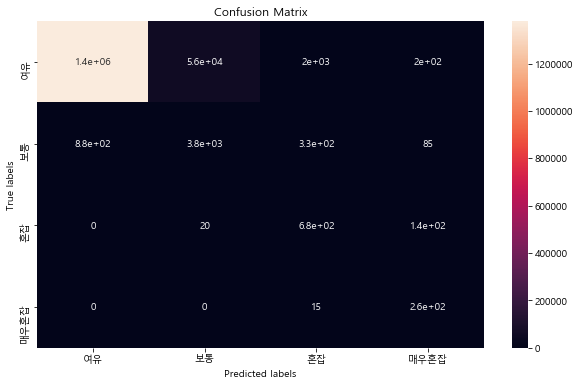

In [54]:
# Confusion Matrix를 생성한다.
y = df_num_pred['CONGESTION']
p = df_num_pred['CONGESTION_P']
conf_mat = confusion_matrix(y, p)
print(conf_mat)

fig, ax = plt.subplots(figsize = (10,6))
sns.heatmap(conf_mat, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['여유', '보통', '혼잡', '매우혼잡'])
ax.yaxis.set_ticklabels(['여유', '보통', '혼잡', '매우혼잡'])

# 정확도, 재현율
print('accuracy', metrics.accuracy_score(y,p) )
print('recall', metrics.recall_score(y,p,average='macro'))

### 4.6. Feature Importance

In [55]:
# feature importance
fi_df_sum = fi_df.groupby('Feature').sum().reset_index(drop=False).sort_values(by='Value',ascending=False)
fi_df_sum

,Feature,Value
7,STTN_ID,2816933
8,TEMP,2273523
5,ROUTE_ID,2083359
10,USE_AREA_CD,2038560
2,HUM,1967697
12,WIND,1815732
0,DD,1416180
9,TZON,1139327
6,SGG_CD,785774
11,WEEK_GB,714731


'본 저작물의 저작권은 Apache License v2.0을 따릅니다'

Copyright 2020 Jungmin Park

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.